# Unit 5 - Financial Planning


In [1]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

# Compute current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18758550,
            "total_supply": 18758550,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 31514.0,
                    "volume_24h": 21944290072,
                    "market_cap": 591181050217,
                    "percentage_change_1h": 0.374964944293368,
                    "percentage_change_24h": -1.51082901381296,
                    "percentage_change_7d": -7.2332235600307,
                    "percent_change_1h": 0.374964944293368,
                    "percent_change_24h": -1.51082901381296,
                    "percent_change_7d": -7.2332235600307
                },
                "CAD": {
                    "price": 39751.7596,
                    "volume_24h": 27680527496.8208,
                    "

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df

# Drop the time component of the date
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio.head()

AGG                                        SPY                 \
              open      high     low   close   volume    open    high    low   
2020-10-16  117.99  118.0778  117.88  117.88  3589312  348.96  350.75  347.1   

                              
             close    volume  
2020-10-16  347.25  62467863

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Creates pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# print the data 
df_savings

,amount
crypto,47761.72
shares,40938.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

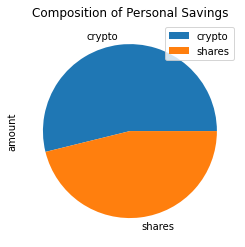

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                          SPY           \
              open      high     low    close    volume    open     high   
2020-05-28  117.14  117.3500  112.24  117.330  18488400  304.65  306.840   
2020-05-29  117.43  117.7100  117.32  117.670  16292692  302.46  304.960   
2020-06-01  117.35  117.3999  117.24  117.365  10635820  303.62  306.205   
2020-06-02  117.38  117.4700  117.31  117.450   7837090  306.55  308.130   
2020-06-03  117.26  117.4100  117.06  117.160  11554888  310.24  313.220   

                                         
               low     close     volume  
2020-05-28  302.24  302.9600   80456712  
2020-05-29  299.47  304.1600  101356845  
2020-06-01  303.06  305.5800   46186733  
2020-06-02  305.10  308.1300   66042497  
2020-06-03  309.94  312.2117   79223813

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [17]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                       SPY  \
              open      high     low    close    volume daily_return    open   
2020-05-28  117.14  117.3500  112.24  117.330  18488400          NaN  304.65   
2020-05-29  117.43  117.7100  117.32  117.670  16292692     0.002898  302.46   
2020-06-01  117.35  117.3999  117.24  117.365  10635820    -0.002592  303.62   
2020-06-02  117.38  117.4700  117.31  117.450   7837090     0.000724  306.55   
2020-06-03  117.26  117.4100  117.06  117.160  11554888    -0.002469  310.24   

                                                               
               high     low     close     volume daily_return  
2020-05-28  306.840  302.24  302.9600   80456712          NaN  
2020-05-29  304.960  299.47  304.1600  101356845     0.003961  
2020-06-01  306.205  303.06  305.5800   46186733     0.004669  
2020-06-02  308.130  305.10  308.1300   66042497     0.008345  
2020-06-03  313.220  309.94  312.2117   79223813     0.013247

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996436,0.997323,1.003267,0.994093,0.999179,1.003317,0.997348,1.012188,1.004724,1.007273,...,1.000256,1.004868,1.004384,0.994681,0.992902,1.000570,0.995478,1.015630,1.000637,0.991916
2,1.003398,1.002775,1.004422,0.980008,1.009045,0.998198,1.003742,1.012775,0.995031,1.008610,...,0.998559,1.009686,1.017689,1.000744,0.989994,1.002797,0.989606,1.016598,0.998765,0.996943
3,0.999403,0.997357,1.009537,0.976191,1.005440,0.996960,1.004360,1.014709,0.994327,1.017353,...,1.008017,1.003345,1.025472,1.005847,0.983240,1.013515,0.984486,1.013629,1.006489,0.981078
4,0.993042,0.986631,1.032165,0.978897,1.001957,1.003025,1.000783,1.022883,0.986666,1.016458,...,0.994608,0.996073,1.029412,1.003615,0.980257,1.004527,0.985717,1.013194,1.008752,0.999329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,507.125391,886.068291,960.388319,822.503167,848.932037,812.126480,760.288430,613.186373,436.864525,580.356917,...,434.488521,329.219149,966.517166,939.951650,1014.095700,1017.952548,1300.117650,970.772914,750.629624,385.504616
7557,509.171132,889.271543,961.064741,829.469059,854.603624,807.404340,763.017405,613.381509,439.751474,576.668097,...,439.020000,330.025202,978.905484,945.540986,1007.649626,1025.272061,1295.740064,964.518800,748.374070,386.056269
7558,503.384913,884.707793,971.280729,847.872308,863.143536,809.123391,766.113721,613.193513,444.757409,565.720370,...,435.677661,332.715777,991.956156,953.482593,1008.906510,1021.309559,1299.570253,963.991330,751.553073,383.979043
7559,502.251727,894.115148,981.428646,845.152071,869.005182,806.728798,762.340039,609.119540,435.119773,561.097691,...,437.223030,331.072008,992.046201,957.737054,1010.406868,1027.312459,1281.137931,972.582098,750.353794,383.779471


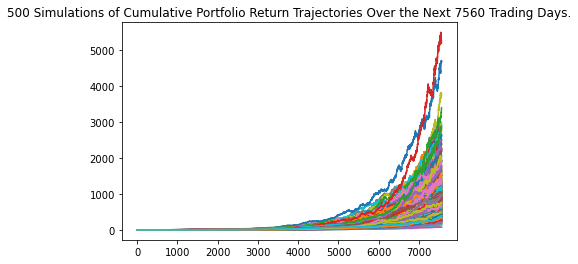

In [20]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

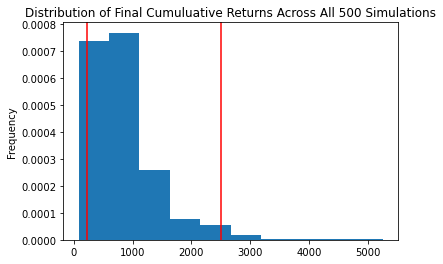

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count            500.000000
mean             871.902152
std              606.095350
min               78.241818
25%              483.131190
50%              719.186471
75%             1063.173733
max             5259.974855
95% CI Lower     218.024333
95% CI Upper    2510.297724
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $4360486.66 and $50205954.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $6540730.0 and $75308931.73


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                       SPY  \
              open      high     low    close    volume daily_return    open   
2020-05-28  117.14  117.3500  112.24  117.330  18488400          NaN  304.65   
2020-05-29  117.43  117.7100  117.32  117.670  16292692     0.002898  302.46   
2020-06-01  117.35  117.3999  117.24  117.365  10635820    -0.002592  303.62   
2020-06-02  117.38  117.4700  117.31  117.450   7837090     0.000724  306.55   
2020-06-03  117.26  117.4100  117.06  117.160  11554888    -0.002469  310.24   

                                                               
               high     low     close     volume daily_return  
2020-05-28  306.840  302.24  302.9600   80456712          NaN  
2020-05-29  304.960  299.47  304.1600  101356845     0.003961  
2020-06-01  306.205  303.06  305.5800   46186733     0.004669  
2020-06-02  308.130  305.10  308.1300   66042497     0.008345  
2020-06-03  313.220  309.94  312.2117   79223813     0.013247

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012002,1.012810,1.005394,0.996262,1.006859,0.992423,0.994545,1.004179,0.990720,1.006118,...,1.007435,0.994316,0.997526,0.996595,1.005532,1.003583,0.997961,1.001376,0.990571,1.015557
2,1.008939,1.028463,1.007533,0.995808,1.006549,1.006670,0.993609,0.998860,1.006686,0.998243,...,1.004932,0.976054,0.997979,0.994410,1.003812,1.003389,0.999454,1.006010,0.982229,1.013728
3,1.014619,1.030386,1.001519,1.006008,1.015812,1.004951,0.978738,0.992399,1.008612,0.988530,...,0.984393,0.974809,1.010668,0.991250,0.991117,0.998636,1.013805,1.007835,0.982053,1.020132
4,1.022286,1.026596,0.991352,1.012204,1.029238,1.001472,0.976957,0.988659,1.008141,0.995704,...,0.980259,0.986659,1.013432,0.987951,0.995551,1.002761,1.011057,1.012499,0.972187,1.024455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.315998,4.035703,4.108720,3.158352,1.752076,2.328110,3.179193,1.901421,3.032168,3.580414,...,3.201928,2.061189,1.458273,3.829407,2.239390,4.817335,3.601814,3.785102,1.714155,3.083800
1257,3.330573,3.999938,4.097078,3.125101,1.761229,2.334624,3.199113,1.918667,3.069963,3.569030,...,3.186234,2.056614,1.463010,3.843752,2.232864,4.797041,3.653331,3.779684,1.717322,3.054726
1258,3.279797,4.000092,4.087848,3.180338,1.751513,2.336387,3.203693,1.922252,3.044096,3.581534,...,3.162298,2.068243,1.454265,3.777839,2.202240,4.686658,3.621352,3.822319,1.717530,3.021486
1259,3.233927,4.018619,4.114885,3.202592,1.757670,2.347545,3.185567,1.915379,3.019889,3.592234,...,3.155535,2.059583,1.447891,3.787193,2.191380,4.728466,3.617200,3.844507,1.736639,3.032187


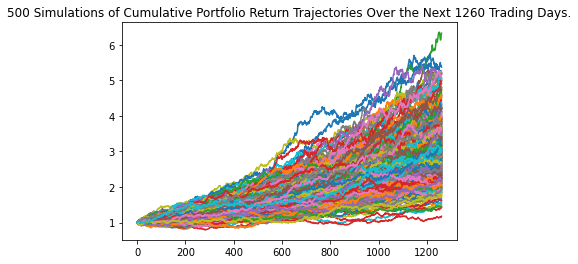

In [27]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

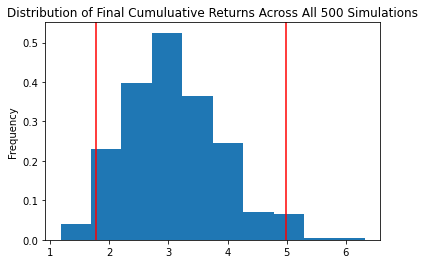

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              3.085958
std               0.809551
min               1.178360
25%               2.484972
50%               3.013986
75%               3.600492
max               6.321024
95% CI Lower      1.781760
95% CI Upper      4.988168
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $106905.59 and $299290.1


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                       SPY  \
              open      high     low    close    volume daily_return    open   
2020-05-28  117.14  117.3500  112.24  117.330  18488400          NaN  304.65   
2020-05-29  117.43  117.7100  117.32  117.670  16292692     0.002898  302.46   
2020-06-01  117.35  117.3999  117.24  117.365  10635820    -0.002592  303.62   
2020-06-02  117.38  117.4700  117.31  117.450   7837090     0.000724  306.55   
2020-06-03  117.26  117.4100  117.06  117.160  11554888    -0.002469  310.24   

                                                               
               high     low     close     volume daily_return  
2020-05-28  306.840  302.24  302.9600   80456712          NaN  
2020-05-29  304.960  299.47  304.1600  101356845     0.003961  
2020-06-01  306.205  303.06  305.5800   46186733     0.004669  
2020-06-02  308.130  305.10  308.1300   66042497     0.008345  
2020-06-03  313.220  309.94  312.2117   79223813     0.013247

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996092,0.989758,1.015830,1.008814,1.006343,1.003340,0.990579,1.009197,0.997924,1.002301,...,0.998693,0.997049,0.990774,0.994550,1.008591,0.986900,1.003271,0.994586,0.995314,0.998410
2,0.989543,0.996428,1.010054,1.016732,1.010402,1.003943,1.004132,1.016341,0.994384,1.007084,...,0.999347,1.007641,0.998511,0.992069,1.000919,0.982468,1.001564,1.002539,0.999231,1.000769
3,0.991260,1.003378,1.003696,1.008218,1.007255,1.006928,1.012517,1.022031,1.001795,1.007603,...,1.013022,1.011096,0.986834,0.987108,0.987153,0.987076,0.998602,0.999262,0.998500,0.993213
4,0.988394,1.008871,1.017684,1.004242,1.008938,1.008570,1.008654,1.026543,1.010843,0.997441,...,1.027435,1.024888,0.982407,0.997865,0.978636,0.982962,0.996027,0.993906,0.986377,0.997808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,14.087839,8.688138,7.254760,6.912615,5.690802,5.462856,11.160261,8.185388,11.420595,7.642659,...,12.020756,14.804936,4.383729,8.321614,5.685149,4.436482,35.184924,8.896683,7.139468,4.176059
2517,13.968705,8.832867,7.290048,6.925084,5.710388,5.432124,11.107300,8.155638,11.338676,7.738100,...,11.974877,14.930537,4.356468,8.306372,5.680437,4.476287,35.422880,8.927733,7.085921,4.121269
2518,14.097004,8.931958,7.165244,7.060743,5.692865,5.457128,11.121784,8.245972,11.377123,7.749675,...,11.849785,14.816662,4.380080,8.340985,5.658081,4.484619,34.912616,8.971734,7.112853,4.128179
2519,14.152863,8.945429,7.237127,7.020347,5.666734,5.388601,11.177931,8.284886,11.375084,7.849473,...,11.710106,14.941588,4.443964,8.287820,5.578188,4.426272,35.057176,8.972966,7.182120,4.143431


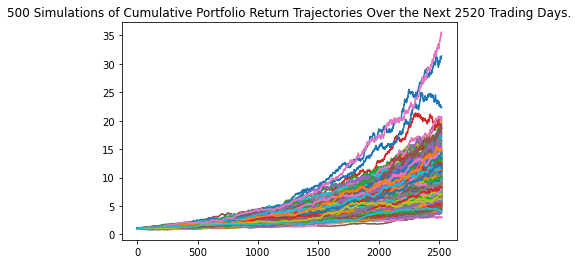

In [33]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

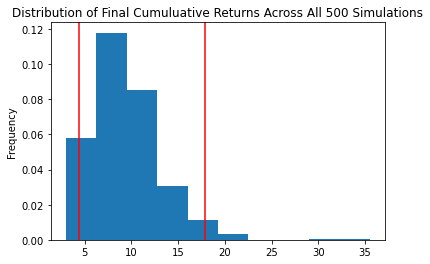

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              9.438289
std               3.692184
min               2.970444
25%               6.863848
50%               8.923218
75%              11.469615
max              35.545405
95% CI Lower      4.389156
95% CI Upper     17.914273
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $263349.34 and $1074856.4
